In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, pi, cos, sqrt, exp

def feval(funcName, *args):
        return eval(funcName)(*args)


def funcaoy(t,y):
  
  dydt=9.81-((0.225/90)*(y**2))
  
  return dydt

def funcaox(t,y):
  
  dxdt = y
  
  return dxdt

def funcao(t,y):

  #Função de x (altura), encontrada como consta na memória de calculo
  x = -y*t + 1000

  return x

def feuler(t, y, x, h, tf, funcy, funcx):
  
  i=0
  n2 = np.arange(t, tf+2*h, h)
  n = len(n2)
  vy=np.zeros(n)
  vt=np.zeros(n)
  vx=np.zeros(n)
  vdx=np.zeros(n)
  dydt=np.zeros(n)
  dxdt=np.zeros(n)
  vy[i]=y
  vt[i]=t
  vx[i]=x
  vdx[i]=y

  while vt[i] < tf:
    #Cálculo da derivada no ponto i que conhecemos
    dydt[i]=feval(funcy, vt[i], vy[i])
    dxdt[i]=feval(funcx, vt[i], vy[i])
    vt[i+1]=vt[i]+h
    vy[i+1]=vy[i]+h*dydt[i]
    vdx[i+1]=vdx[i]+h*dxdt[i]

    vx[i]=funcao(vt[i], vdx[i])

    #Parada no momento em que a altura chega a 0
    if vx[i] <= 0.00001:
      print('O tempo de queda aproximado foi: %1.1f segundos' %vt[i])
      break
    i = i+1
  j=0

  vete=[vt[j] for j in range(i+1)]
  veips=[vy[j] for j in range(i+1)]
  vex=[vx[j] for j in range(i+1)]
  vedx=[vdx[j] for j in range(i+1)]
  return vete, veips, vex, vedx

t0=0 #Tempo inicial
y0=0 #Velocidade inicial
x0=1000 #Altura inicial
h=0.1 #Passo do calculo da EDO
tf=10 #Tempo final estimado a partir da visualização do gráfico
funcy = 'funcaoy'
funcx = 'funcaox'
impress=feuler(t0, y0, x0, h, tf, funcy, funcx)

O tempo de queda aproximado foi: 6.2 segundos


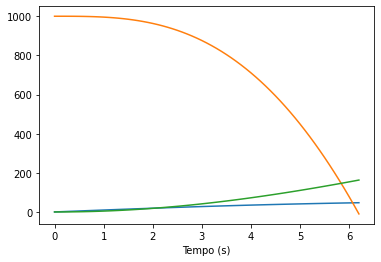

In [2]:
x1=impress[0] #Valores do tempo
y1=impress[1] #Valores de dydt(aceleração)
z1=impress[2] #Valores de x(altura)
w1=impress[3] #Valores de dxdt(velocidade)
plt.plot(x1,y1) #Gráfico para aceleração pelo tempo em azul
plt.plot(x1,z1) #Gráfico da altura pelo tempo em laranja
plt.plot(x1,w1) #Gráfico da velocidade pelo tempo em verde
plt.xlabel('Tempo (s)')
plt.show()